---

## Understanding Data

In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Monatszahlen_Verkehrsunfälle.csv')

# Step 2: Drop the specified columns
columns_to_drop = ["VORJAHRESWERT", "VERAEND_VORMONAT_PROZENT", "VERAEND_VORJAHRESMONAT_PROZENT", "ZWOELF_MONATE_MITTELWERT"]
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the DataFrame
print(df[50:55])


        MONATSZAHL AUSPRAEGUNG  JAHR   MONAT   WERT
50  Alkoholunfälle   insgesamt  2020   Summe  430.0
51  Alkoholunfälle   insgesamt  2020  202001   28.0
52  Alkoholunfälle   insgesamt  2020  202002   40.0
53  Alkoholunfälle   insgesamt  2020  202003   27.0
54  Alkoholunfälle   insgesamt  2020  202004   26.0


In [6]:
x = df[df['JAHR'] <= 2020]

print (x['MONATSZAHL'].unique())
print (x['AUSPRAEGUNG'].unique())
print (min(x['JAHR'].unique()))
print (min(x['MONAT'].unique()))




['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']
['insgesamt' 'Verletzte und Getötete' 'mit Personenschäden']
2000
200001


In [7]:
# Group by category and type and count NaN values in 'WERT'
nan_counts = x.groupby(['MONATSZAHL', 'AUSPRAEGUNG'])['WERT'].apply(lambda x: x.isna().sum()).reset_index()

# Rename the column for clarity
nan_counts.rename(columns={'WERT': 'NaN_Count'}, inplace=True)
print(nan_counts)

        MONATSZAHL             AUSPRAEGUNG  NaN_Count
0   Alkoholunfälle  Verletzte und Getötete          0
1   Alkoholunfälle               insgesamt          0
2    Fluchtunfälle  Verletzte und Getötete          0
3    Fluchtunfälle               insgesamt          0
4  Verkehrsunfälle  Verletzte und Getötete          0
5  Verkehrsunfälle               insgesamt          0
6  Verkehrsunfälle     mit Personenschäden          0


## You will see the line plot for each category with mean per year

<Figure size 1200x800 with 0 Axes>

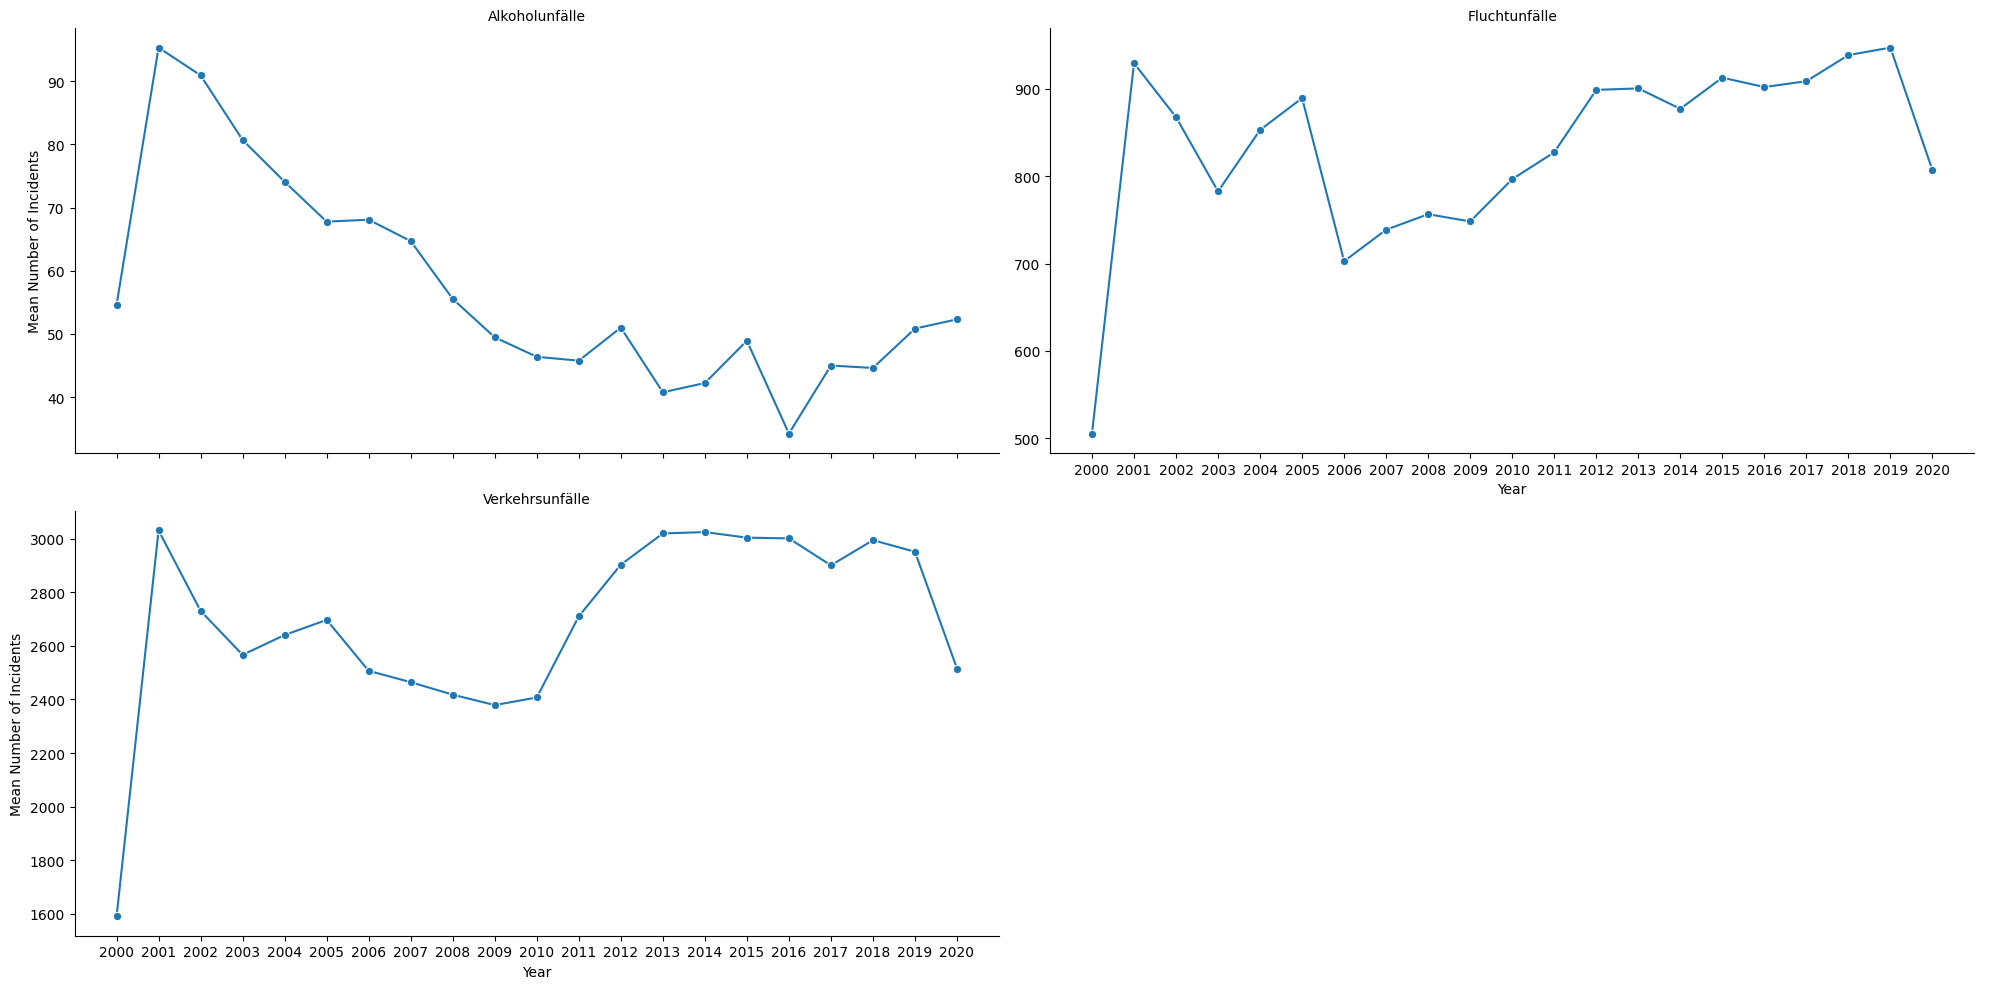

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

y = df[df['JAHR'] <= 2020]
y_mean = y.groupby(['MONATSZAHL', 'JAHR'])['WERT'].mean().reset_index()

# Ensure 'JAHR' is treated as a string for proper ordering in plots
y_mean['JAHR'] = y_mean['JAHR'].astype(str)

# Plotting
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(y_mean, col='MONATSZAHL', col_wrap=2, height=5, aspect=2, sharey=False)

# Use lineplot with x='JAHR' and y='WERT'
g.map(sns.lineplot, 'JAHR', 'WERT', marker='o')

# Add labels and legend
g.add_legend()
g.set_axis_labels("Year", "Mean Number of Incidents")
g.set_titles(col_template="{col_name}")

# Show plot
plt.show()

## All categories with their mean per year in single plot, highest is verkehrsunfall

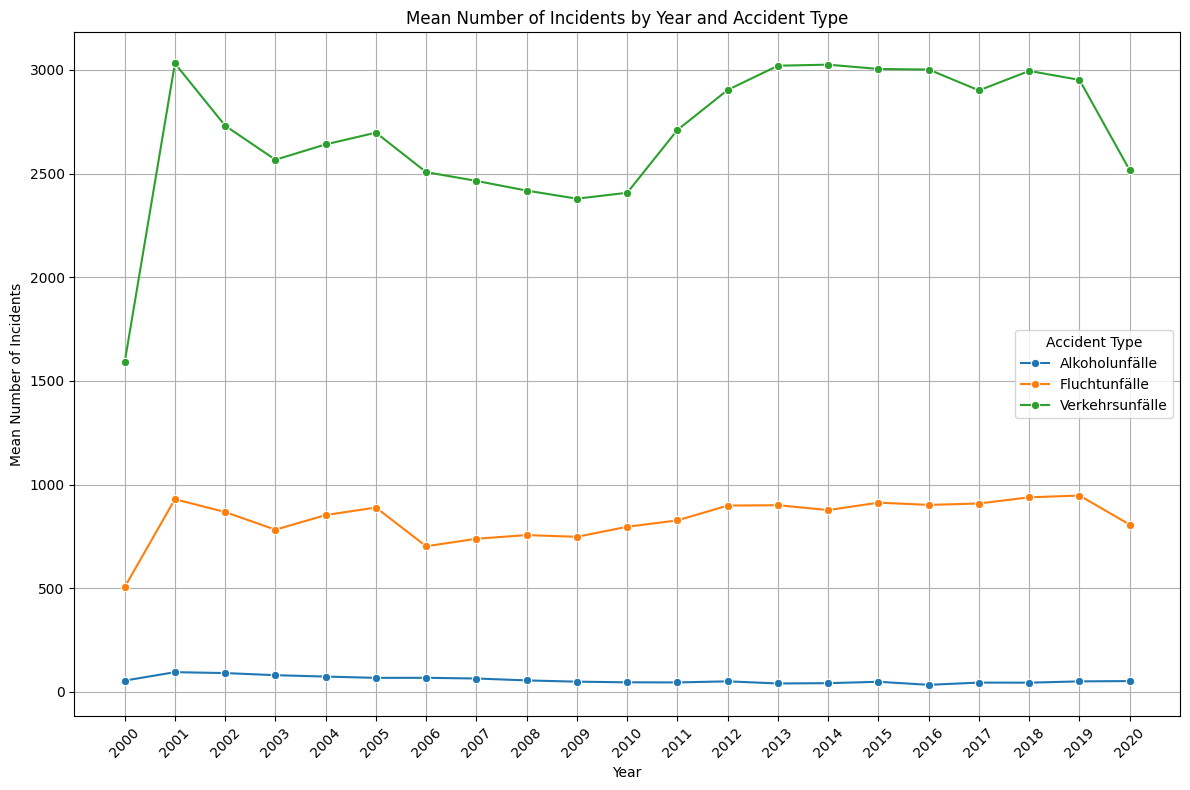

In [9]:
plt.figure(figsize=(12, 8))

# Plot each category with a different line
sns.lineplot(data=y_mean, x='JAHR', y='WERT', hue='MONATSZAHL', marker='o')

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Mean Number of Incidents")
plt.title("Mean Number of Incidents by Year and Accident Type")
plt.legend(title='Accident Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

## The blue shaded area is the range of values and the line is the mean for the following plot

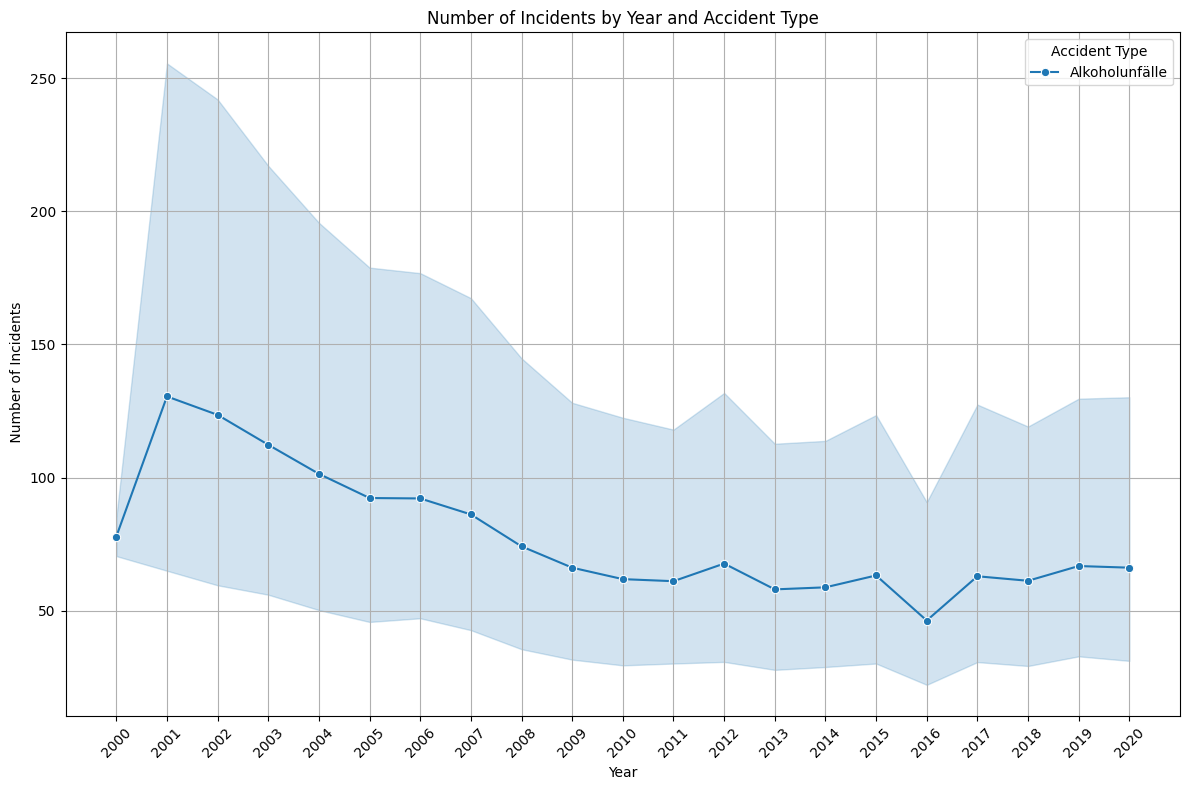

In [10]:
y=df.copy()

# Filtering data
y=y[y['JAHR'] <= 2020]
y['JAHR'] = y['JAHR'].astype(str) 

y = y.sort_values(by='JAHR')
y = y[(y['MONATSZAHL'] == 'Alkoholunfälle') & (y['AUSPRAEGUNG'] == 'insgesamt')]


plt.figure(figsize=(12, 8))

# Plot each category with a different line
sns.lineplot(data=y, x='JAHR', y='WERT', hue='MONATSZAHL', marker='o')

# Add labels and legend
plt.xlabel("Year")
plt.ylabel(" Number of Incidents")
plt.title("Number of Incidents by Year and Accident Type")
plt.legend(title='Accident Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

## Model training testing and Predicting values 

In [29]:
# Filter the data for the given category and type
filtered_df = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt')]

# Exclude rows where 'MONAT' is 'Summe'
filtered_df = filtered_df[filtered_df['MONAT'] != 'Summe']
filtered_df['MONAT'] = filtered_df['MONAT'].str[4:]

# Drop rows with missing 'WERT' values (if any)
filtered_df.dropna(subset=['WERT'], inplace=True)

# Define features and target
X = filtered_df[['JAHR', 'MONAT']]
y = filtered_df['WERT']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Define the input data for prediction
input_data = pd.DataFrame({'JAHR': [2021], 'MONAT': ['01']})

# Make the prediction
prediction = model.predict(input_data)
print(f'Predicted WERT for Alkoholunfälle, insgesamt, January 2021: {prediction[0]}')

Mean Squared Error: 82.22134464285713
Predicted WERT for Alkoholunfälle, insgesamt, January 2021: 16.81


In [46]:
wert_min = filtered_df['WERT'].min()
wert_max = filtered_df['WERT'].max()
wert_mean = filtered_df['WERT'].mean()
wert_variance = filtered_df['WERT'].var()

print(f'Min WERT: {wert_min}')
print(f'Max WERT: {wert_max}')
print(f'Mean WERT: {wert_mean}')
print(f'Variance of WERT: {wert_variance}')


Min WERT: 10.0
Max WERT: 107.0
Mean WERT: 43.1231884057971
Variance of WERT: 320.05022397891963


## MSE is quit low compared to standard daviation of WERT so the model work well

### the model pridicts somewhat well for the for 01.2021 actual: 16.0 predicted: 22.96


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor  

X = filtered_df[['JAHR', 'MONAT']].astype(int)
y = filtered_df['WERT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the XGBoost model
xg_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Define the input data for prediction (Ensure it matches the feature columns and types)
input_data = pd.DataFrame({'JAHR': [2021], 'MONAT': [1]})

# Note: Ensure that input_data has the same feature columns and preprocessing as X_train
# Example feature processing might be required here if needed

# Make the prediction
xg_prediction = xg_model.predict(input_data)
print(f'Predicted WERT for Alkoholunfälle, insgesamt, January 2021: {xg_prediction[0]}')

Mean Squared Error: 75.47780581512097
Predicted WERT for Alkoholunfälle, insgesamt, January 2021: 15.865035057067871


### The best regresion model in this use case is Xgboost regressor with lowest mse and closest prediction bellow you can see the prediction error for both models for year 2021

In [52]:
wert_min = filtered_df['WERT'].min()
wert_max = filtered_df['WERT'].max()
wert_mean = filtered_df['WERT'].mean()
wert_variance = filtered_df['WERT'].var()

print(f'Min WERT: {wert_min}')
print(f'Max WERT: {wert_max}')
print(f'Mean WERT: {wert_mean}')
print(f'Variance of WERT: {wert_variance}')


Min WERT: 10.0
Max WERT: 107.0
Mean WERT: 43.1231884057971
Variance of WERT: 320.05022397891963


In [51]:
# Load the CSV file into a DataFrame
df_target = pd.read_csv('Monatszahlen_Verkehrsunfälle.csv')

# Step 2: Drop the specified columns
columns_to_drop = ["VORJAHRESWERT", "VERAEND_VORMONAT_PROZENT", "VERAEND_VORJAHRESMONAT_PROZENT", "ZWOELF_MONATE_MITTELWERT"]
df_target = df_target.drop(columns=columns_to_drop)
df_target = df_target[(df_target['MONATSZAHL'] == 'Alkoholunfälle') & (df_target['AUSPRAEGUNG'] == 'insgesamt')]

df_target['MONAT'] = df_target['MONAT'].astype(str)
df_target = df_target[ (df_target['MONAT'] == '202101')]
print(df_target)

        MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT
38  Alkoholunfälle   insgesamt  2021  202101  16.0
